In [1]:
import keras
from keras.datasets import imdb
import numpy as np
import pandas as pd
from keras import layers
from keras import models

Using TensorFlow backend.


In [2]:
(train_data,train_labels), (test_data,test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


In [3]:
train_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [4]:
train_data.shape

(25000,)

In [5]:
train_labels.shape

(25000,)

In [6]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [7]:
' '.join(['a','b','c'])

'a b c'

In [8]:
d = {'a':2}
d.get('a')

2

In [9]:
word_to_id = keras.datasets.imdb.get_word_index()
word_to_id = {key:(value + 3) for key,value in word_to_id.items()}
word_to_id["Start: "] = 1
word_to_id["<UNK>"] = 2

id_to_word = {value:key for key,value in word_to_id.items()}
decoded_review=(' '.join(id_to_word[id] for id in train_data[0] ))

1646592/1641221 [==============================] - 0s 0us/step


In [10]:
decoded_review

"Start:  this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

In [0]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

In [0]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [13]:
x_train.shape

(25000, 10000)

In [14]:
x_test.shape

(25000, 10000)

In [0]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [16]:
y_train.shape

(25000,)

In [17]:
y_test.shape

(25000,)

In [0]:
model = models.Sequential()
model.add(layers.Dense(16, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

In [0]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])

In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [21]:
x_val.shape

(10000, 10000)

In [22]:
y_val.shape

(10000,)

In [23]:
partial_x_train.shape

(15000, 10000)

In [24]:
partial_y_train.shape

(15000,)

In [25]:
#history = model.fit(partial_x_train, partial_y_train, validation_data=(x_val,y_val), epochs=20, batch_size=512)
history = model.fit(x_train, y_train, epochs=4, batch_size=512)

Epoch 1/4
25000/25000 [==============================] - 3s 139us/step - loss: 0.1457 - acc: 0.8173
Epoch 2/4
25000/25000 [==============================] - 3s 107us/step - loss: 0.0760 - acc: 0.9114
Epoch 3/4
25000/25000 [==============================] - 3s 103us/step - loss: 0.0574 - acc: 0.9326
Epoch 4/4
25000/25000 [==============================] - 3s 104us/step - loss: 0.0476 - acc: 0.9436


In [26]:
history.history.keys()

dict_keys(['loss', 'acc'])

In [27]:
model.evaluate(x_test,y_test)

25000/25000 [==============================] - 2s 89us/step


[0.08623239455342292, 0.88352]

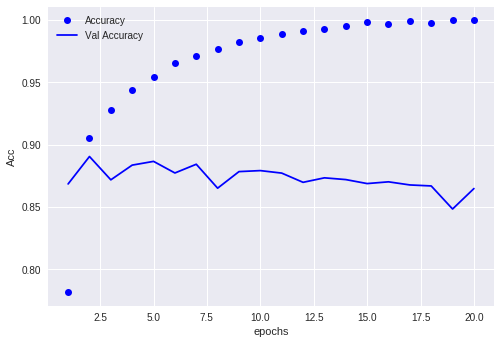

In [27]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label = "Accuracy")
plt.plot(epochs, val_acc, 'b', label = "Val Accuracy")
plt.xlabel('epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

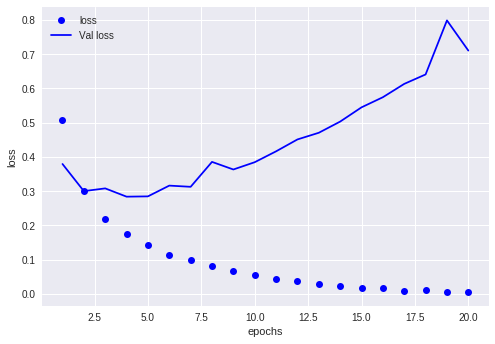

In [28]:
plt.clf()
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label = "loss")
plt.plot(epochs, val_loss, 'b', label = "Val loss")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [18]:
model2 = models.Sequential()
model2.add(layers.Dense(16, activation="relu", input_shape=(10000,)))
model2.add(layers.Dense(16, activation="relu"))
model2.add(layers.Dense(1, activation="sigmoid"))

model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model2.fit(x_train, y_train, epochs=4, batch_size=512)

Epoch 1/4
25000/25000 [==============================] - 3s 133us/step - loss: 0.4491 - acc: 0.8166
Epoch 2/4
25000/25000 [==============================] - 3s 108us/step - loss: 0.2551 - acc: 0.9096
Epoch 3/4
25000/25000 [==============================] - 3s 106us/step - loss: 0.1970 - acc: 0.9294
Epoch 4/4
25000/25000 [==============================] - 3s 106us/step - loss: 0.1669 - acc: 0.9410


In [19]:
loss, acc = model2.evaluate(x_test,y_test)

25000/25000 [==============================] - 2s 92us/step


In [20]:
acc

0.8836

In [31]:
loss

NameError: ignored

In [21]:
model2.predict(x_test)

array([[0.22207366],
       [0.99969435],
       [0.81739014],
       ...,
       [0.19444264],
       [0.06158669],
       [0.58217454]], dtype=float32)

In [33]:
y_test

array([0., 1., 1., ..., 0., 0., 0.], dtype=float32)

In [0]:
model3 = models.Sequential()
model3.add(layers.Dense(16, activation = "relu", input_shape = (10000,)))
model3.add(layers.Dense(16, activation = "relu"))
model3.add(layers.Dense(16, activation = "relu"))
model3.add(layers.Dense(1, activation = "sigmoid"))

In [0]:
model3.compile(optimizer = "rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

In [22]:
histoy = model3.fit(x_train, y_train, epochs = 4, batch_size=512)

Epoch 1/4
25000/25000 [==============================] - 3s 126us/step - loss: 0.4588 - acc: 0.8159
Epoch 2/4
25000/25000 [==============================] - 3s 101us/step - loss: 0.2522 - acc: 0.9078
Epoch 3/4
25000/25000 [==============================] - 3s 101us/step - loss: 0.1913 - acc: 0.9304
Epoch 4/4
25000/25000 [==============================] - 2s 99us/step - loss: 0.1629 - acc: 0.9419


In [23]:
histoy.history.keys()

dict_keys(['loss', 'acc'])

In [24]:
model3.evaluate(x_test,y_test)

25000/25000 [==============================] - 3s 115us/step


[0.3082447087907791, 0.88068]